In [1]:
from __future__ import print_function
import sys
import os
import errno
import stat
import shutil
import tempfile
import git
import pytest


def handle_remove_readonly(func, path, exc):
  excvalue = exc[1]
  if func in (os.rmdir, os.remove) and excvalue.errno == errno.EACCES:
      os.chmod(path, stat.S_IRWXU| stat.S_IRWXG| stat.S_IRWXO) # 0777
      func(path)
  else:
      raise


class TempRepo(git.Repo):
    @staticmethod
    def clone_from_to_temp(url, **kwargs):
        directory_name = tempfile.mkdtemp()
        return TempRepo.clone_from(url, directory_name, **kwargs)

    @property
    def directory(self):
        return os.path.join(self.git_dir, '..')

    def __exit__(self, type, value, traceback):
        shutil.rmtree(self.directory, ignore_errors=False, onerror=handle_remove_readonly)
        return git.Repo.__exit__(self, type, value, traceback)

with TempRepo.clone_from_to_temp('https://github.com/msiemens/tinydb', branch='master') as repo:
    print(repo.directory)
    pytest.main([repo.directory])


c:\users\artur\appdata\local\temp\tmpenacy5\.git\..
============================= test session starts =============================
platform win32 -- Python 2.7.13, pytest-3.0.5, py-1.4.32, pluggy-0.4.0
rootdir: c:\users\artur\appdata\local\temp\tmpenacy5, inifile: 
collected 102 items

..\..\..\..\appdata\local\temp\tmpenacy5\tests\test_middlewares.py ........
..\..\..\..\appdata\local\temp\tmpenacy5\tests\test_operations.py .......
..\..\..\..\appdata\local\temp\tmpenacy5\tests\test_queries.py ...................
..\..\..\..\appdata\local\temp\tmpenacy5\tests\test_storages.py ...........
..\..\..\..\appdata\local\temp\tmpenacy5\tests\test_tables.py ........
..\..\..\..\appdata\local\temp\tmpenacy5\tests\test_tinydb.py .......................................
..\..\..\..\appdata\local\temp\tmpenacy5\tests\test_utils.py ..........

========================= 102 passed in 1.05 seconds ==========================


C:\Users\Artur\Development\workspace\MachineLearning\src\AEVB.py
C:\Users\Artur\Development\workspace\MachineLearning\src\AEVBExample.py
C:\Users\Artur\Development\workspace\MachineLearning\src\ArchetypalAnalysis.py
C:\Users\Artur\Development\workspace\MachineLearning\src\ArchetypeExample.py
C:\Users\Artur\Development\workspace\MachineLearning\src\AstTest.py
C:\Users\Artur\Development\workspace\MachineLearning\src\ExtractFeaturesInception.py
C:\Users\Artur\Development\workspace\MachineLearning\src\__init__.py


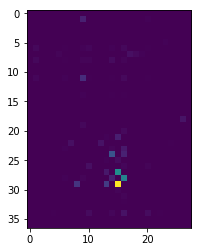

In [31]:
import ast
from collections import Counter
from collections import defaultdict
import os




#parent = python_ast#.body

pairs = []
#list_data = defaultdict(list)
list_data = []

#def iter_child_nodes(node):
#    for name, field in ast.iter_fields(node):
#        if isinstance(field, ast.AST):
#            yield name, field
#        elif isinstance(field, list):
#            for item in field:
#                if isinstance(item, ast.AST):
#                    yield name, item
#
#def walk(parent):
#    child_generator = iter_child_nodes(parent)
#    #next(child_generator) # skip first element, because it is the same node
#    for name, child in child_generator:
#        #if len(pairs) < 1000:
#        if not isinstance(child, ast.Module):
#            pairs.append(((type(parent), name), type(child)))
#            #print(child)
#            #print(dir(child))
#            walk(child)

def do_lists(parent, keyword, child_list):
#    list_data[(parent, keyword)] += child_list + [None]
    for child in child_list:
        if child is None:
            list_data.append(((type(parent), keyword), None))
        else:
            list_data.append(((type(parent), keyword), type(child)))

def walk2(node):
    parent = node
    for keyword, child in ast.iter_fields(node):
        if isinstance(child, ast.AST):
            pairs.append(((type(parent), keyword), type(child)))
            walk2(child)
        elif isinstance(child, list):
            do_lists(parent, keyword, child)
            for item in child:
                if isinstance(item, ast.AST):
                    walk2(item)


directory = r'C:\Users\Artur\Development\workspace\MachineLearning\src'
for file in os.listdir(directory):
    if file.endswith('.py'):
        path = os.path.join(directory, file)
        print(path)
        
        with open(path, 'r') as python_file:
            python_code = python_file.read()
        python_ast = ast.parse(python_code)

        walk2(python_ast)

#counter_data = Counter(list_data)

import pandas as pd

pairs = pd.DataFrame(pairs)
pairs.columns = ['parent', 'child']
frequency = pd.crosstab(pairs.parent, pairs.child)

list_data = pd.DataFrame(list_data)
list_data.columns = ['parent', 'child']
frequency_list_data = pd.crosstab(list_data.parent, list_data.child)

import matplotlib.pylab as plt
%matplotlib inline 

plt.imshow(frequency.values)

In [6]:
import numpy as np
frequency = frequency.astype(np.float)
frequency.values[:] = frequency.values / frequency.values.sum(axis=1, keepdims=True)

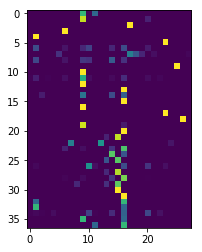

In [7]:
plt.imshow(frequency.values)

In [8]:
frequency.columns

Index([ <class '_ast.ListComp'>,     <class '_ast.BinOp'>,
         <class '_ast.UnaryOp'>,     <class '_ast.IfExp'>,
            <class '_ast.Dict'>,       <class '_ast.Sub'>,
       <class '_ast.Subscript'>,  <class '_ast.ExtSlice'>,
           <class '_ast.Param'>,      <class '_ast.Call'>,
             <class '_ast.Num'>,     <class '_ast.Tuple'>,
           <class '_ast.Index'>,     <class '_ast.Store'>,
       <class '_ast.Attribute'>,      <class '_ast.Load'>,
            <class '_ast.Name'>,       <class '_ast.Add'>,
            <class '_ast.Mult'>,       <class '_ast.Div'>,
             <class '_ast.Str'>,       <class '_ast.Pow'>,
            <class '_ast.List'>,   <class '_ast.Compare'>,
           <class '_ast.Slice'>,      <class '_ast.USub'>,
       <class '_ast.arguments'>,  <class '_ast.FloorDiv'>],
      dtype='object', name=u'child')

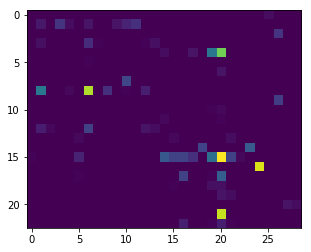

In [32]:
plt.imshow(frequency_list_data.values)

In [33]:
frequency_list_data

child,<class '_ast.ListComp'>,<class '_ast.Expr'>,<class '_ast.AugAssign'>,<class '_ast.Import'>,<class '_ast.If'>,<class '_ast.BinOp'>,<class '_ast.Assign'>,<class '_ast.With'>,<class '_ast.Return'>,<class '_ast.ClassDef'>,...,<class '_ast.Attribute'>,<class '_ast.Name'>,<class '_ast.Str'>,<class '_ast.List'>,<class '_ast.Slice'>,<class '_ast.keyword'>,<class '_ast.comprehension'>,<class '_ast.alias'>,<class '_ast.Eq'>,<class '_ast.Is'>
parent,,,,,,,,,,,,,,,,,,,,,
"(<class '_ast.ListComp'>, generators)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
"(<class '_ast.Module'>, body)",0,6,0,14,3,0,5,0,0,5,...,0,0,0,0,0,0,0,0,0,0
"(<class '_ast.Import'>, names)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,14,0,0
"(<class '_ast.If'>, body)",0,4,0,0,0,0,12,1,0,0,...,0,0,0,0,0,0,0,0,0,0
"(<class '_ast.Assign'>, targets)",0,0,0,0,0,0,0,0,0,0,...,37,74,0,0,0,0,0,0,0,0
"(<class '_ast.With'>, body)",0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(<class '_ast.ClassDef'>, bases)",0,0,0,0,0,0,0,0,0,0,...,0,5,0,0,0,0,0,0,0,0
"(<class '_ast.ClassDef'>, body)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(<class '_ast.FunctionDef'>, body)",0,38,0,0,2,0,83,0,13,0,...,0,0,0,0,0,0,0,0,0,0
